In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from PIL import Image

In [29]:
data = []
labels = []
classes = 43
current_path = os.getcwd()

for i in range(classes):
    path = os.path.join(current_path, "train", str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open(path + "\\" + a)
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error Loading Image")
            
data = np.array(data)
labels = np.array(labels)

In [30]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [32]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation = "relu", input_shape = X_train.shape[1:]))
model.add(Conv2D(32, (5, 5), activation = "relu"))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(43, activation = "softmax"))

In [33]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "adam",
             metrics = ["acc"])

In [34]:
history = model.fit( X_train, y_train, epochs = 15, validation_data = (X_test, y_test))

Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 42s 1ms/step - loss: 0.7189 - acc: 0.8255 - val_loss: 0.1368 - val_acc: 0.9644
Epoch 2/15
31367/31367 [==============================] - 42s 1ms/step - loss: 0.1787 - acc: 0.9529 - val_loss: 0.1004 - val_acc: 0.9741
Epoch 3/15
31367/31367 [==============================] - 43s 1ms/step - loss: 0.1317 - acc: 0.9636 - val_loss: 0.1000 - val_acc: 0.9736
Epoch 4/15
31367/31367 [==============================] - 43s 1ms/step - loss: 0.1189 - acc: 0.9677 - val_loss: 0.0544 - val_acc: 0.9857
Epoch 5/15
31367/31367 [==============================] - 43s 1ms/step - loss: 0.1208 - acc: 0.9687 - val_loss: 0.0441 - val_acc: 0.9888
Epoch 6/15
31367/31367 [==============================] - 44s 1ms/step - loss: 0.1128 - acc: 0.9711 - val_loss: 0.0623 - val_acc: 0.9839
Epoch 7/15
31367/31367 [==============================] - 43s 1ms/step - loss: 0.0929 - acc: 0.9763 - val_loss: 0.0565 - val_acc:

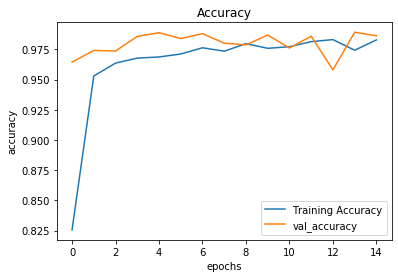

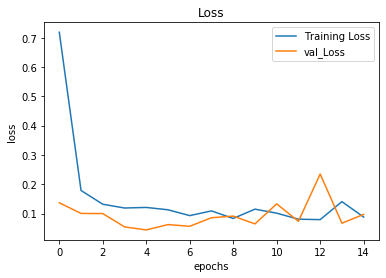

In [35]:
plt.plot(history.history["acc"], label = "Training Accuracy")
plt.plot(history.history["val_acc"], label = "val_accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.figure()
plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["val_loss"], label = "val_Loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

In [38]:
y_test = pd.read_csv("Test.csv")

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

for img in imgs:
    image = Image.open(img)
    image = image.resize((30, 30))
    data.append(np.array(image))
    
X_test = np.array(data)

prediction = model.predict_classes(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(labels, prediction)

0.9380047505938243

In [39]:
model.save("Traffic_Classification.h5")